# Estadistica inferencial

Vamos a trabajar las siguientes ideas:

- Poblacion
- Muestra
- Parametros
- Estimador

In [1]:
# Vamos a usar el dataset de arbolado para los ejemplos
%matplotlib inline
import pandas as pd

arbolado = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv")

C:\Users\Ionatan\AppData\Local\Temp\ipykernel_7780\1878531578.py:5: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  arbolado = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv")


In [3]:
arbolado.head()

,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


In [4]:
# Queremos ver que pasa con la altura media de los arboles y queremos ver como podemos inferir ese valor sin mirar toda la muestra

valor_medio_altura_arboles = arbolado["altura_arbol"].mean()
print (f'El valor medio real de la altura de TODOS los arboles es {valor_medio_altura_arboles}')

El valor medio real de la altura de TODOS los arboles es 9.036131504572813


Lo que acabamos de hacer es la altura media poblacional.

In [7]:
# ¿Como podriamos haber hecho una estimacion similar sin mirar todos los arboles?

N = 100

estimacion_n = arbolado.sample(N)["altura_arbol"].mean()
print (f"Estimacion tomando solo {N} valores: {estimacion_n}")

# Vemos que es bastante similar

Estimacion tomando solo 100 valores: 9.585858585858587


In [19]:
# Y si lo hacemos m veces
import numpy as np

N = 1000
m = 1000

valores = []
for i in range(m):
    estimacion_n = arbolado.sample(N)["altura_arbol"].mean()
    valores = valores + [estimacion_n]
    if m<=10:
        print (f"Estimacion numero {i} tomando solo {N} valores: {estimacion_n}")
print ('\n')
print (f'La media de las medias dio {np.mean(valores)} y su desviacion estandar {np.std(valores)}')
print (f'Recordar que la media poblacion al es {arbolado["altura_arbol"].mean()} y la desviacion de las alturas (no de las medias) es {arbolado["altura_arbol"].std()}')



La media de las medias dio 9.035344283115146 y su desviacion estandar 0.15641830244424154
Recordar que la media poblacion al es 9.036131504572813 y la desviacion de las alturas (no de las medias) es 4.894624931676406


<AxesSubplot:xlabel='altura_arbol', ylabel='Count'>

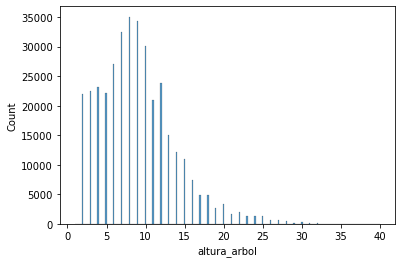

In [20]:
import seaborn as sns
# ¿Como es la muestra original?

sns.histplot(data=arbolado['altura_arbol'])

# ¿Podemos ver mas en detalle?

<AxesSubplot:>

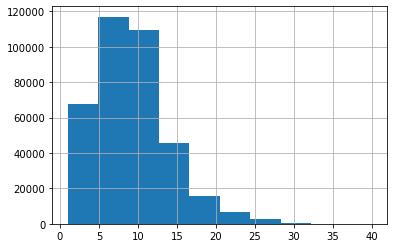

In [21]:
# Ver que queda mas lindo y descriptivo que 

arbolado['altura_arbol'].hist()

In [9]:
# ¿Pero que pasa con las especies, influye mucho que especie es en la altura?

arbolado["nombre_cientifico"].value_counts()

Fraxinus pennsylvanica    133609
Platanus x acerifolia      32319
Ficus benjamina            22508
Tilia x moltkei            15605
Melia azedarach            14901
                           ...  
Juglans mandshurica            1
Osmanthus fragrans             1
Sterculia monosperma           1
Ficus microcarpa               1
Pyracantha coccinea            1
Name: nombre_cientifico, Length: 431, dtype: int64

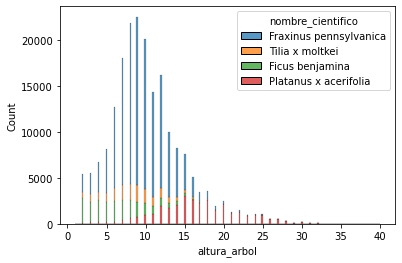

In [32]:
n_especies = 4
arbolado_reducido = arbolado[arbolado['nombre_cientifico'].isin(arbolado['nombre_cientifico'].value_counts().index[:n_especies])]

g = sns.histplot(data=arbolado_reducido, x='altura_arbol', hue='nombre_cientifico', multiple='stack')

# Conclusion, que especie se selecciona en el muestreo es re importante!

<AxesSubplot:>

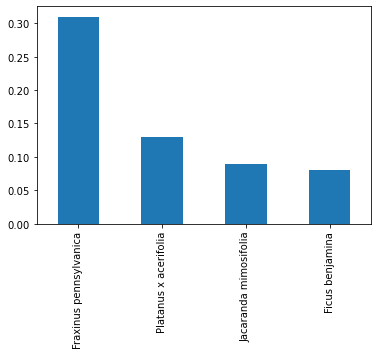

In [39]:
# Veamos que especies se muestrean

n = 100
(arbolado.sample(n)["nombre_cientifico"].value_counts()/n).head(n_especies).plot(kind = "bar")

In [40]:
%matplotlib qt
import matplotlib.pyplot as plt

In [46]:
# ¿Como podemos solucionar esto?

# Estratificando por especie, osea tomando de cada especie una proporcion que corresponda a la proporcion que hay de esa especie en la muestra
# Para eso vamos a calcular que porcentaje queremos de la muestra (a partir del numero) y vamos a elegir ese porcentaje luego de un groupby

n = 100
frac = n/arbolado.shape[0]

seleccion = arbolado.groupby('nombre_cientifico', group_keys=False).apply(lambda x: x.sample(frac=frac))

plt.figure()
seleccion["nombre_cientifico"].value_counts().head(n_especies).plot(kind = "bar")


<AxesSubplot:>

In [47]:
# Vemos como dio la distribucion


plt.figure()
for especie in seleccion["nombre_cientifico"].value_counts()[0:n_especies].index:
    #arbolado[arbolado["nombre_cientifico"]==especie]["altura_arbol"].hist(bins = [0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,20,30,40])
    seleccion[seleccion["nombre_cientifico"]==especie]["altura_arbol"].hist()

# Vemos que los elementos cambian pero la proporcion de especies no

In [48]:
%matplotlib inline

Estimadores como variables aleatorias

100%|██████████| 1000/1000 [00:10<00:00, 93.12it/s]


<AxesSubplot:>

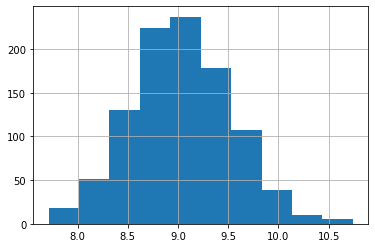

In [58]:
import tqdm
n = 100
n_sampleos = 1000 # Ir variando este n
valores_estimador_mean = []

for i in tqdm.tqdm(range(n_sampleos)):
    valores_estimador_mean += [arbolado.sample(n)["altura_arbol"].mean()]

means = pd.Series({"Mean_alturas":valores_estimador_mean})
means.hist()

100%|██████████| 1000/1000 [00:10<00:00, 92.10it/s]


<AxesSubplot:>

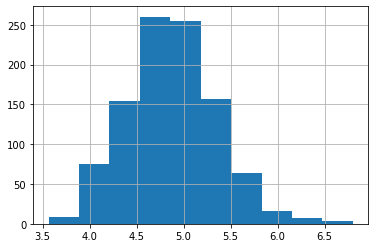

In [60]:
# Lo mismo si tomamos otra medida, por ejemplos la std

n = 100
n_sampleos = 1000 # Ir variando este n
valores_estimador_mean = []

for i in tqdm.tqdm(range(n_sampleos)):
    valores_estimador_mean += [arbolado.sample(n)["altura_arbol"].std()]

means = pd.Series({"Mean_alturas":valores_estimador_mean})
means.hist()

100%|██████████| 10000/10000 [00:04<00:00, 2102.82it/s]


<AxesSubplot:>

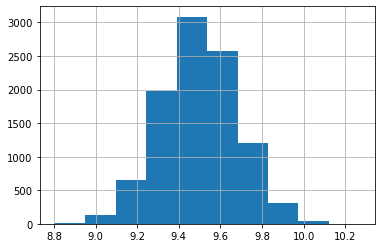

In [59]:
# ¿siempre da estilo gaussiana? rta corta: SI (teorema central del limite)
import random
import numpy as np

lista = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

n = 1000
n_sampleos = 10000
means = []

for i in tqdm.tqdm(range(n_sampleos)):
    means += [np.mean(random.choices(lista,k=n))]

means = pd.Series({"Mean_uniforme":means})
means.hist()


# Vamos a ver experimentalmente si es cierto que:

$\sigma = \sigma_s$

y que 

$\sigma_{\hat{x}} = \frac{\sigma}{\sqrt{n}}$

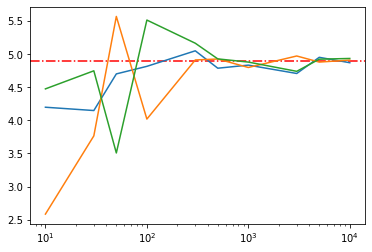

In [61]:
# Primero vamos a ver si es cierto que el std de las muestras es similar al de la poblacion para diferentes n
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xscale('log')
sigma = arbolado["altura_arbol"].std()
plt.axhline(y=sigma, color='r', linestyle='-.')

enes = [10,30,50,100,300,500,1000,3000,5000,10000]
pruebas = 3
for i in range(pruebas):
    sigmas_muestras = []
    for n in enes:
        sigmas_muestras += [arbolado.sample(n)["altura_arbol"].std()]
    ax.plot(enes,sigmas_muestras)


Tomando muestras de tamaño 10000... : 100%|██████████| 10/10 [00:13<00:00,  1.31s/it]

Valores de n: [10, 30, 50, 100, 300, 500, 1000, 3000, 5000, 10000]
Valores experimental de desviacion del valor medio tomando 100 valores medios en funcion de los enes.: [1.4734707104023412, 0.8593632882341626, 0.7578709013410929, 0.4942877870335377, 0.2694694147705368, 0.23523044443890073, 0.15428765418255494, 0.08999460318864924, 0.06605058634289662, 0.05159278141862325]
Valores teorico de desviacion del valor medio tomando 100 valores medios en funcion de los enes.: [1.5478163076343476, 0.8936321618687832, 0.6922044961106256, 0.48946249316764057, 0.2825913021885626, 0.21889428143187412, 0.1547816307634348, 0.08936321618687833, 0.06922044961106256, 0.04894624931676406]


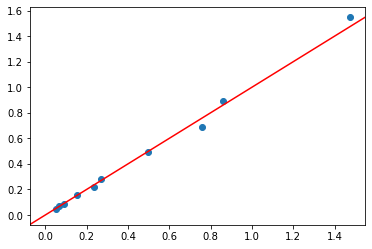

In [62]:
# Veamos ahora si se cumple experimentalmente que la desviacion del estimador esta vinculado con la desviacion de la poblacion y el tamaño de la muestra


enes = [10,30,50,100,300,500,1000,3000,5000,10000]
n_sampleos = 100 # Le pomenos 100 porque mas tarda mucho
sigma = arbolado["altura_arbol"].std()

sigma_estimador_exp_n = []

pbar = tqdm.tqdm(enes)
for n in pbar:
    pbar.set_description(f"Tomando muestras de tamaño {n}... ")
    valores_estimador_mean = []
    for i in range(n_sampleos):
        valores_estimador_mean += [arbolado.sample(n)["altura_arbol"].mean()]
    sigma_estimador_exp_n += [np.std(valores_estimador_mean)]

sigma_estimador_teo_n = [sigma/np.sqrt(n) for n in enes]

print (f'Valores de n: {enes}')
print (f'Valores experimental de desviacion del valor medio tomando {n_sampleos} valores medios en funcion de los enes.: {sigma_estimador_exp_n}')
print (f'Valores teorico de desviacion del valor medio tomando {n_sampleos} valores medios en funcion de los enes.: {sigma_estimador_teo_n}')

fig, ax = plt.subplots()
ax.scatter(sigma_estimador_exp_n,sigma_estimador_teo_n)
ax.axline((0, 0), (1, 1), color='r')


¿Cual es la gran ventaja de lo que acabamos de mostrar?

Que no hay que hacer un monton de valores medios para saber como es su distribucion de error! Con una muestra alcanza.

Imaginemos ahora la siguiente pregunta:

- ¿Cual es la altura promedio de los [Melia azedarach](https://es.wikipedia.org/wiki/Melia_azedarach)?

Para responder esa pregunta vamos a asumir que no disponemos de todos los datos del arbolado de la ciudad sino que hicimos un relevamiento de pocos arboles en la comuna en la que vivimos (si no viven en caba elijan la que coincida con el final de su numero de documento)

In [83]:
# Veamos como implementar el codigo esta cuenta
import scipy.stats as stats

# Vamos a hacer el ejemplo con 20 y 40 arboles para la comuna 9
n=100
especie = "Melia azedarach"
mascara = (arbolado["comuna"]==9) & (arbolado["nombre_cientifico"] == especie)
datos = arbolado[mascara].sample(n)["altura_arbol"]
mean = datos.mean()
std = datos.std()
print (mean)
print (std)

8.727272727272727
2.9513683502989876


¿Cuan confiable es el resultado anterior?



Pasar a pizarra y explicar: hay tanta probabilidad de que el valor real difiera de lo que se medio en "hasta tanto". Ojo que no es lo mismo que la probabilida de encontrar un arbol y que mida mas o menos que la media.

Explicar Z

In [90]:
alpha = 0.05 # Que haya un 90% de probabilidad de que el valor promedio este en el rango. 
z_alfa_sobre_2_norm = stats.norm.ppf(alpha/2)
ic_high = mean - z_alfa_sobre_2_norm * std / np.sqrt(n)
ic_low = mean + z_alfa_sobre_2_norm * std / np.sqrt(n)

print (f'El valor esperado para el promedio de altura de los arboles {especie} encontrados en CABA con un {(1-alpha)*100}% de confianza esta entre {ic_high} y {ic_low} m.')


El valor esperado para el promedio de altura de los arboles Melia azedarach encontrados en CABA con un 95.0% de confianza esta entre 9.305730294442467 y 8.148815160102986 m.


¿Que pasa si no confiamos en que la distribucion sea realmente gaussiana? Hay una variante que es la [t-student](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student)

Es una funcion que se parece pero es un poco mas complejo y cuenta los "grados" de libertad ademas de considerar la desviacion de la muestra sin asumir que es lo mismo que la de la poblacion. 

In [91]:
alpha = 0.05
grados_libertad = n - 1
z_alfa_sobre_2_t = stats.t.ppf(alpha/2, grados_libertad)
ic_high = mean - z_alfa_sobre_2_t * std / np.sqrt(n)
ic_low = mean + z_alfa_sobre_2_t * std / np.sqrt(n)

print (f'El valor esperado para el promedio de altura de los arboles {especie} encontrados en CABA con un {(1-alpha)*100}% de confianza esta entre {ic_high} y {ic_low} m.')


El valor esperado para el promedio de altura de los arboles Melia azedarach encontrados en CABA con un 95.0% de confianza esta entre 9.312888238353674 y 8.14165721619178 m.
